<a href="https://colab.research.google.com/github/Jainish-shah/Data-Analysis-of-Google-App-s-Rating/blob/main/Data_Analysis_Google_Play_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('eda-google-play-store')
jovian.set_colab_id('1udnD3sjfe_wXfL5z70P6uRfILsf924dL')

     |████████████████████████████████| 71kB 3.1MB/s 


# Data Analysis of Google App's Rating

The dataset is all taken from Google App Store taking the data about the App Rating using the Web Scraping. So it Web Scraped data of 10,000 Play Store app for analysing the Android market.

### `Get the dataset from Kaggle`
>by using the following Link download the dataset from Kaggle website https://www.kaggle.com/lava18/google-play-store-apps

In [2]:
project_name = "EDA-Google-Play-Store"

In [3]:
!pip install jovian --upgrade -q

In [4]:
!pip install numpy

In [5]:
!pip install pandas
!pip install seaborn
!pip install matplotplotlib

ERROR: Could not find a version that satisfies the requirement matplotplotlib (from versions: none)
ERROR: No matching distribution found for matplotplotlib


In [6]:
#we import the relevant packages.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jovian
%matplotlib inline

In [7]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/jainish-shah/eda-google-play-store


'https://jovian.ai/jainish-shah/eda-google-play-store'

In [10]:
jovian.commit(project=project_name, environment=None, files=["googleplaystore.csv"])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jainish-shah/eda-google-play-store


'https://jovian.ai/jainish-shah/eda-google-play-store'

## Reading dataset

In [11]:
play_df = pd.read_csv("googleplaystore.csv")
play_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Data Preparation

We can see that the dataframes of the google play-store has many missing values.So let's use describe() pandas method that will help us to get a statistic summary of numerical columns in our dataset, by the way we can also use info() method for the same.

In [12]:
play_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
play_df.shape

(10841, 13)

In [14]:
play_df.dtypes

# here we had a watch how many different number of apps that are divided into various 
# categories.
# Eg. Reviews column has numeric values and non-numeric values which makes a problem for 
# us to have unique values in that corresponding columns.

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [15]:
# Now let's fetch the total number of unique apps/exact amount of apps in the app column...

play_df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [16]:
len(play_df['App'].unique())

9660

In [17]:
# similarly lets fetch the unique values in the app category column...

play_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

## Data Cleaning 
### that is removal of duplicate records

Here we will be dropping down the duplicates from the dataset using the drop_duplicate 
method which will increase the accuary of exploration and quality . 

REFER : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.drop_duplicates.html

In [18]:
play_df.drop_duplicates(keep='first',inplace = True)

# in drop_duplicates we are passing the argument keep = "first" which means except the 
# first value the pandas method will remove all the values ....

In [19]:
play_df.shape

(10358, 13)

As we can see that our initial googleplaystore.csv contains 10841 rows × 13 columns and after drop_duplicates thee shape is 10358 x 13 .

In [20]:
play_df.isnull().sum().sort_values(ascending = True)

# here we are looking for the total amount of missing values in every column 

App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
Type                 1
Content Rating       1
Android Ver          3
Current Ver          8
Rating            1465
dtype: int64

Dropping the missing values would be the way to get rid of missing values but there are some ways by which we can change the missing values 

In [21]:
play_df.dropna(how = "any",inplace= True)
play_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In the dataset, The columns "Reviews" , "Size" , "Price" ,"Installs"  have numeric values and some symbols too that we need to remove.

In [22]:
# First lets find uniqueness in Install columns

play_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [23]:
# We came to know that Installs columns has '+' symbol which we need to remove to make 
# data more useful as Installs will be numeric only

play_df['Installs'] = play_df['Installs'].apply(lambda x : x.replace('+',"") if '+' in str(x) else x)
play_df['Installs'] = play_df["Installs"].apply(lambda x : x.replace(",",'') if "," in str(x) else x)
play_df['Installs'] = play_df['Installs'].apply(lambda x : int(x))

play_df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [24]:
# Similarly lets perform the same for the Reviews columns...

play_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [25]:
play_df['Reviews'] = play_df['Reviews'].apply(lambda x: int(x))

play_df['Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

In [26]:
play_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [27]:
# Now lets remove the '$' from the Price column

play_df['Price'] = play_df['Price'].apply(lambda x : float(x.replace('$','')) if '$' in str(x) else x)
# just to remove the zeros from the columns of price 
play_df['Price'] = play_df['Price'].apply(lambda x:float(x))
play_df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [28]:
play_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [29]:
play_df['Size'] = play_df['Size'].apply(lambda x: str(x).replace('Varies with device','NaN'))
play_df['Size'] = play_df['Size'].apply(lambda x : str(x).replace('M',''))
play_df['Size'] = play_df['Size'].apply(lambda x : str(x).replace(',',''))
play_df['Size'] = play_df['Size'].apply(lambda x : float(str(x).replace('k','')))/1000

# at last conversion to float 
play_df['Size'] = play_df['Size'].apply(lambda x:float(x))

play_df['Size'].unique()

array([0.019 , 0.014 , 0.0087, 0.025 , 0.0028, 0.0056, 0.029 , 0.033 ,
       0.0031, 0.028 , 0.012 , 0.02  , 0.021 , 0.037 , 0.0055, 0.017 ,
       0.039 , 0.031 , 0.0042, 0.023 , 0.006 , 0.0061, 0.0046, 0.0092,
       0.0052, 0.011 , 0.024 ,    nan, 0.0094, 0.015 , 0.01  , 0.0012,
       0.026 , 0.008 , 0.0079, 0.056 , 0.057 , 0.035 , 0.054 , 0.201 ,
       0.0036, 0.0057, 0.0086, 0.0024, 0.027 , 0.0027, 0.0025, 0.007 ,
       0.016 , 0.0034, 0.0089, 0.0039, 0.0029, 0.038 , 0.032 , 0.0054,
       0.018 , 0.0011, 0.0022, 0.0045, 0.0098, 0.052 , 0.009 , 0.0067,
       0.03  , 0.0026, 0.0071, 0.022 , 0.0064, 0.0032, 0.0082, 0.0049,
       0.0095, 0.005 , 0.0059, 0.013 , 0.073 , 0.0068, 0.0035, 0.004 ,
       0.0023, 0.0021, 0.042 , 0.0091, 0.055 , 0.0073, 0.0065, 0.0015,
       0.0075, 0.051 , 0.041 , 0.048 , 0.0085, 0.046 , 0.0083, 0.0043,
       0.0047, 0.0033, 0.04  , 0.0078, 0.0088, 0.0066, 0.0051, 0.061 ,
       0.066 , 0.079 , 0.0084, 0.0037, 0.118 , 0.044 , 0.695 , 0.0016,
      

now let's check that if the "Review" ,"Price","Size" and "Installs" are converted to numeric or not

In [30]:
play_df.describe()

,Rating,Reviews,Size,Installs,Price
count,8886.000000,8.886000e+03,7418.000000,8.886000e+03,8886.000000
mean,4.187959,4.730928e+05,0.037592,1.650061e+07,0.963526
std,0.522428,2.906007e+06,0.094998,8.640413e+07,16.194792
min,1.000000,1.000000e+00,0.001000,1.000000e+00,0.000000
25%,4.000000,1.640000e+02,0.005900,1.000000e+04,0.000000
50%,4.300000,4.723000e+03,0.016000,5.000000e+05,0.000000
75%,4.500000,7.131325e+04,0.037000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,0.994000,1.000000e+09,400.000000


In [31]:
play_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [32]:
import jovian

In [33]:
jovian.commit(project=project_name, environment=None, files=["googleplaystore.csv"])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jainish-shah/eda-google-play-store


'https://jovian.ai/jainish-shah/eda-google-play-store'

> so till now we have gathered all the statistical data that we can and also converted the data that were in the incorrect format and dropping tables also done

## Exploratory Analysis and Visualization

In this section we will visualize data with the help of matplotlib and seaborn libraries as sometimes some of the correction cannot be seen from the tabular data which the plots clearly depicts.

### `Pricing across categories`

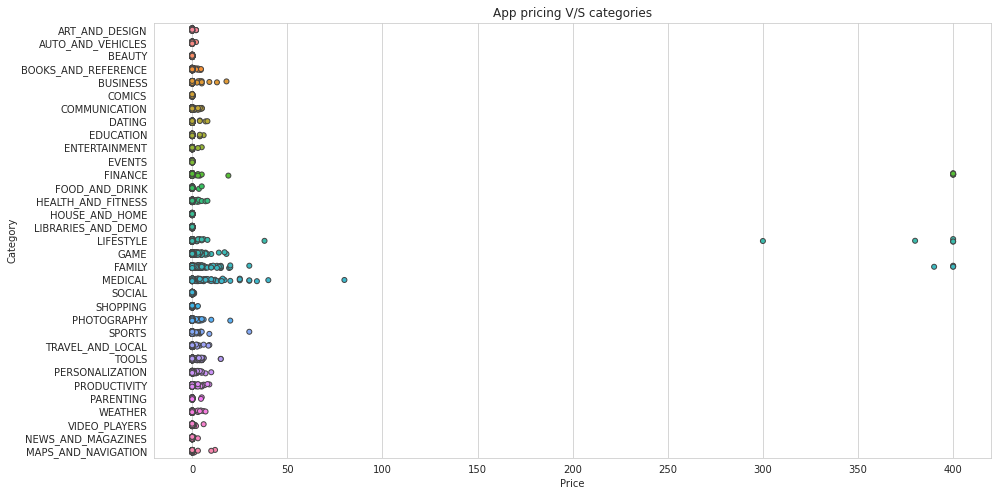

In [34]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Price", y="Category", data=play_df, jitter=True, linewidth=1)
title = ax.set_title('App pricing V/S categories')

### `Apps According to Content Rating`

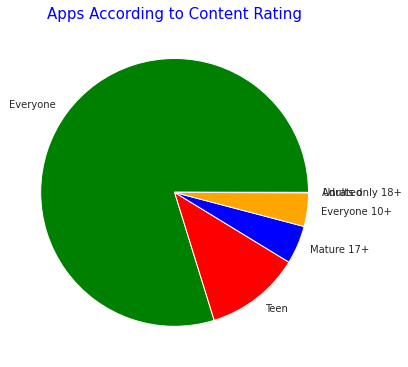

In [35]:
labels = play_df['Content Rating'].value_counts().index
colors = ['green','r','blue','orange','black','yellow']
sizes = play_df['Content Rating'].value_counts().values

# visual 
plt.figure(0,figsize = (6,7))
plt.pie(sizes, labels=labels, colors=colors)
plt.title('Apps According to Content Rating',color = 'blue',fontsize = 15)
plt.show()

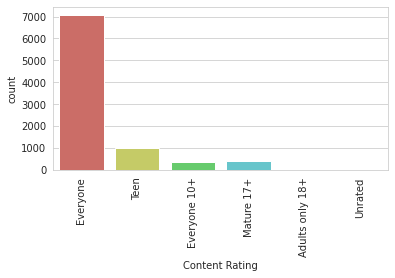

In [36]:
# try to gather the different ccontent rating graph

plt.figure(figsize=(6,3))
fig = sns.countplot(x=play_df['Content Rating'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

### `Apps According to the category`

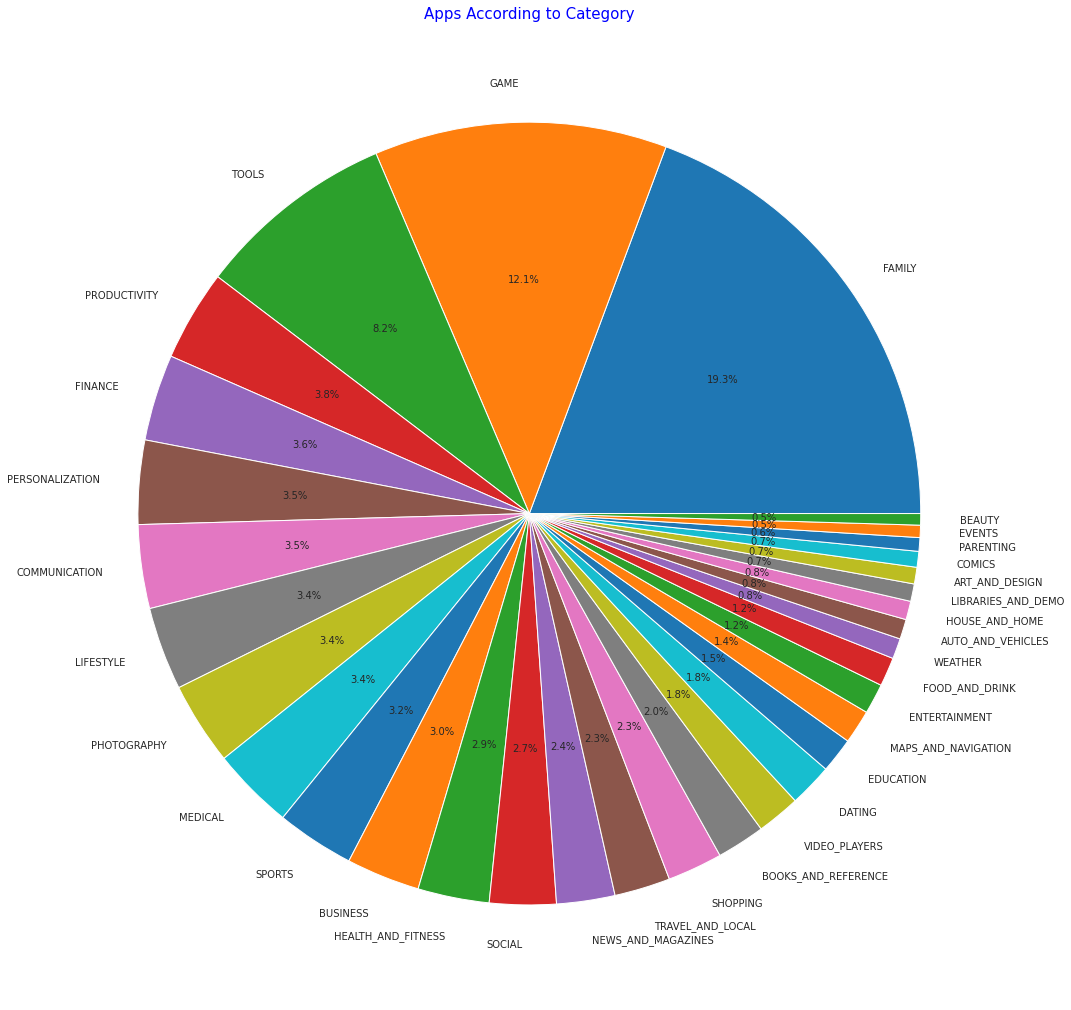

In [37]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

labels = play_df['Category'].value_counts().index
sizes = play_df['Category'].value_counts().values

plt.figure(0,figsize = (18,18))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Apps According to Category',color = 'blue',fontsize = 15)
plt.show()

### `counts of the install of certain category`

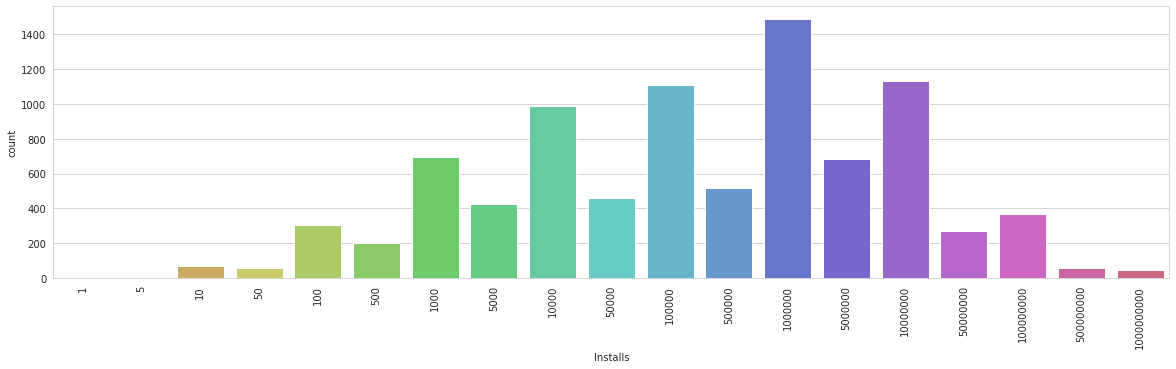

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
fig = sns.countplot(x=play_df['Installs'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

### `lets see the distribution of prices`

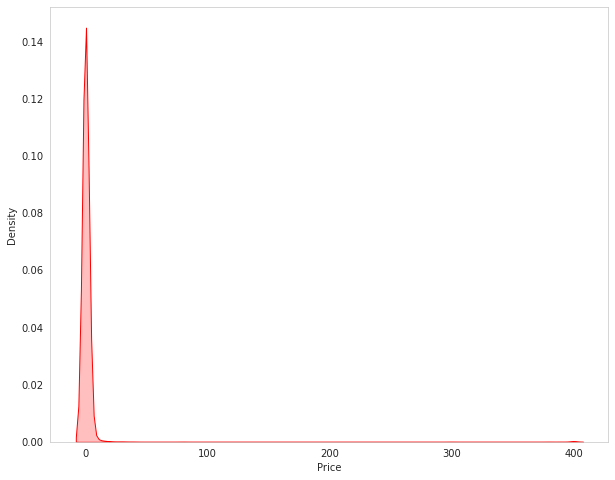

In [39]:
plt.figure(figsize = (10,8))
sns.kdeplot(play_df.Price , shade = True , color = 'red')
plt.grid()
plt.show()

### `lets see the best android version`

In [40]:
play_df['Android Ver'].value_counts()

4.1 and up            1987
4.0.3 and up          1197
Varies with device    1178
4.0 and up            1092
4.4 and up             789
2.3 and up             573
5.0 and up             481
4.2 and up             330
2.3.3 and up           238
3.0 and up             207
2.2 and up             203
4.3 and up             199
2.1 and up             112
1.6 and up              87
6.0 and up              46
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              16
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
8.0 and up               5
4.4W and up              5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


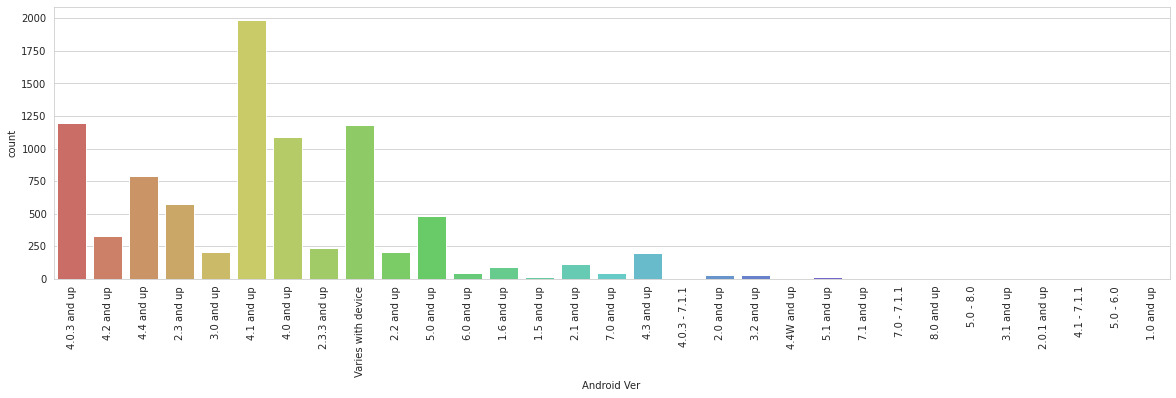

In [41]:
plt.figure(figsize=(20,5))
fig = sns.countplot(play_df['Android Ver'] , palette = "hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90);
plt.show(fig)

In [42]:
import jovian

In [43]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/jainish-shah/eda-google-play-store


'https://jovian.ai/jainish-shah/eda-google-play-store'

In [44]:
jovian.commit(project=project_name, environment=None, files=["googleplaystore.csv"])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jainish-shah/eda-google-play-store


'https://jovian.ai/jainish-shah/eda-google-play-store'

## Asking and Answering Questions

#### `which apps are having 4.0 ratings or above`

In [45]:
df_rating  = play_df[play_df.Rating == 4.0]
df_rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
20,Logo Maker - Small Business,ART_AND_DESIGN,4.0,450,0.0140,100000,Free,0.0,Everyone,Art & Design,"April 20, 2018",4.0,4.1 and up
39,How To Color Disney Princess - Coloring Pages,ART_AND_DESIGN,4.0,591,0.0094,500000,Free,0.0,Everyone,Art & Design,"March 31, 2018",1,4.0 and up
50,Real Tractor Farming,AUTO_AND_VEHICLES,4.0,1598,0.0560,1000000,Free,0.0,Everyone,Auto & Vehicles,"July 26, 2018",11.0,4.1 and up
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,0.2010,100000,Free,0.0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
66,Used Cars Mexico,AUTO_AND_VEHICLES,4.0,190,0.0025,50000,Free,0.0,Everyone,Auto & Vehicles,"October 14, 2016",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10802,FR: My Famous Lover,FAMILY,4.0,185,0.0280,10000,Free,0.0,Teen,Entertainment,"August 6, 2015",1.3.0,3.0 and up
10814,FR: My Secret Pets!,FAMILY,4.0,785,0.0310,50000,Free,0.0,Teen,Entertainment,"June 3, 2015",1.3.1,3.0 and up
10817,HTC Sense Input - FR,TOOLS,4.0,885,0.0080,100000,Free,0.0,Everyone,Tools,"October 30, 2015",1.0.612928,5.0 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,5000000,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


#### `Which Apps are having price more than $200`

In [46]:
play_df[['Category','App']][play_df.Price > 200].groupby(['Category']).count()

,App
Category,
FAMILY,4
FINANCE,6
LIFESTYLE,5


#### `check if the price affects the ratings of the Apps`

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


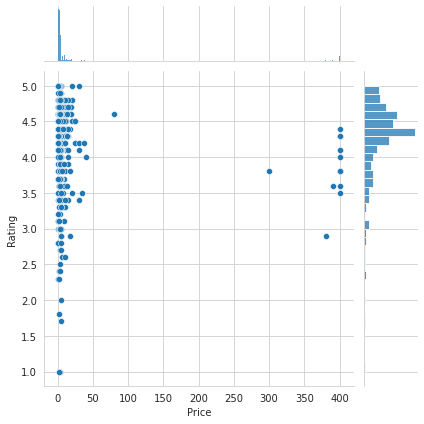

In [47]:
paid = play_df[play_df.Price > 0]        # checking for the apps that are paided
sns.jointplot( "Price", "Rating", paid);

# clearly from the plot we can see that there are less apps that are having pricing higher than $200 ( that is from the left graph)

#### `Which category has more number of apps`

In [48]:
category_df = play_df['Category'].value_counts().head()
category_df

FAMILY          1717
GAME            1074
TOOLS            733
PRODUCTIVITY     334
FINANCE          317
Name: Category, dtype: int64

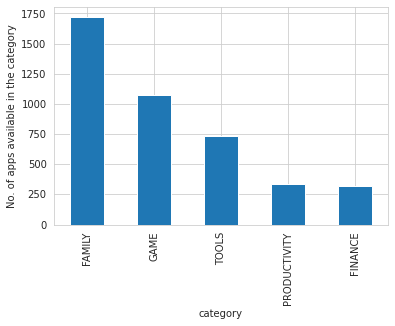

In [49]:
category_df.plot(kind ='bar')
plt.xlabel('category')
plt.ylabel('No. of apps available in the category')
plt.show()

#### `Which app in the social media category most installed`

In [50]:
social_df = play_df[play_df['Category']=='SOCIAL']
social_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2546,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,"August 1, 2018",Varies with device,Varies with device
2547,"Messages, Text and Video Chat for Messenger",SOCIAL,4.4,49173,0.0040,10000000,Free,0.0,Everyone,Social,"June 4, 2018",1.24,4.1 and up
2548,Tumblr,SOCIAL,4.4,2955326,NaN,100000000,Free,0.0,Mature 17+,Social,"August 1, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,Alarm.fo – choose your info,SOCIAL,4.4,19,0.0031,1000,Free,0.0,Everyone,Social,"May 29, 2018",1.4.8,4.1 and up
10714,FunForMobile Ringtones & Chat,SOCIAL,4.4,68358,0.0072,5000000,Free,0.0,Mature 17+,Social,"May 7, 2016",3.22,4.1 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,NaN,100000,Free,0.0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10799,Fr Daoud Lamei,SOCIAL,4.7,2036,0.0068,100000,Free,0.0,Everyone,Social,"May 20, 2018",1.72,4.0.3 and up


In [51]:
social_df['Installs'].idxmax(axis = 'rows')

2544

In [52]:
import jovian

In [53]:
jovian.commit(project=project_name, environment=None, files=["googleplaystore.csv"])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jainish-shah/eda-google-play-store


'https://jovian.ai/jainish-shah/eda-google-play-store'

## Inferences and Conclusion

Conclusion
Exploratory data analysis is an inherent part of data exploration that helps to get a general knowledge about the dataset you work with as well as find basic conceptions and outlines to get first insights.

In [54]:
import jovian

In [55]:
jovian.commit(project=project_name, environment=None, files=["googleplaystore.csv"])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jainish-shah/eda-google-play-store


'https://jovian.ai/jainish-shah/eda-google-play-store'

## References and Future Work

The best references for the project to explore documentation and videos of jovian ml again to get ideas...

> For documentation regarding seaborn and matplotlib refer the examples on https://matplotlib.org/contents.html?v=20200929184818
    
> For documentation regarding pandas https://pandas.pydata.org/pandas-docs/stable/?v=20200929184818
    
> For documentation regarding numpy https://numpy.org/doc/stable/reference/?v=20200929184818

In [56]:
import jovian

In [57]:
jovian.commit(project=project_name, environment=None, files=["googleplaystore.csv"])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jainish-shah/eda-google-play-store


'https://jovian.ai/jainish-shah/eda-google-play-store'